In [1]:
import cv2
import matplotlib.pyplot as plt 

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
fozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(fozen_model, config_file)

In [4]:
classLabels = []
file_names = ['coco.names']  # Make file_names a list

for file_name in file_names:  # Iterate over the file_names list
    with open(file_name, 'rt') as fpt:
        classLabels.extend(fpt.read().strip().split('\n'))  # Use extend to add the labels to classLabels

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [6]:
print(len(classLabels))

91


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000020830027D70>

In [24]:
img = cv2.imread('./Images/1.png')

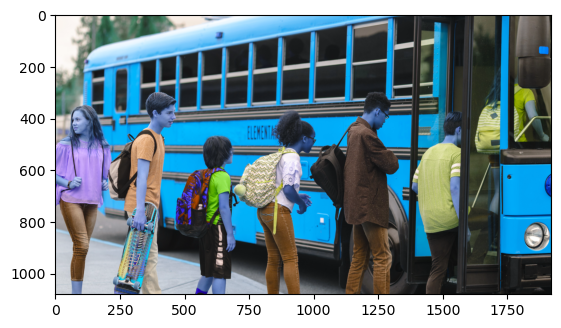

In [25]:
plt.imshow(img)

In [26]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.55)

In [27]:
print(ClassIndex)

[1 1 1 6 1 1 1]


In [28]:
font_scale = 3
font = cv2.FONT_HERSHEY_COMPLEX
for ClassInd, conf, boxes in zip(ClassIndex, confidence, bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 3)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=4)

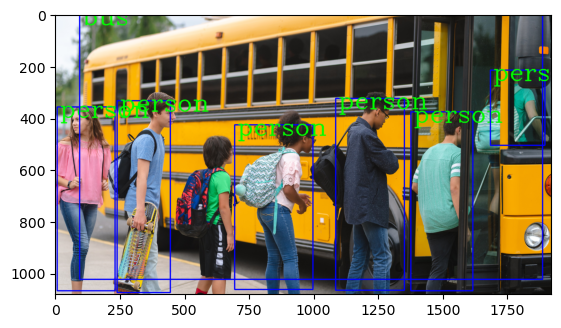

In [29]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [31]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN   

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <=9578):
                cv2.rectangle(frame, boxes, (255, 0, 0), 3)
                cv2.putText(frame, classLabels[ClassInd -1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()


In [30]:
cap = cv2.VideoCapture('./Videos/bikes.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN 
cap.set(3, 1280)
cap.set(4,720)


while True:
    success,img = cap.read()
    classIds, confs, bbox = model.detect(img, confThreshold=0.5)
    print(classIds, bbox)

    if (len(classIds) != 0):
       for classId,confidence,box in zip(classIds.flatten(),confs.flatten(),bbox):
            if (ClassInd <=91):
                cv2.rectangle(img,box,color=(0,255,0),thickness=2)
                cv2.putText(img,classLabels[classId-1].upper(),(box[0]+10,box[1]+30), cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),1)

    cv2.imshow("Output", img)
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


[ 1  2  1  2  1  2  2  1  2  1  1  2  2  2 10  3 10  2  2 10  1  1  2  1
  1  1  1  2 10  1 10] [[ 212  290  130  235]
 [ 994  416  114  193]
 [   0  195  231  523]
 [ 394  363  150  210]
 [ 649  218  244  499]
 [ 212  391  151  167]
 [ 639  491  178  229]
 [1093  285   47  116]
 [1230  303   24   58]
 [ 410  283  119  276]
 [ 891  288   41   99]
 [ 131  398  180  168]
 [ 871  290   36   89]
 [ 326  367   77   99]
 [1169  101   20   41]
 [ 196  294   58   45]
 [ 832  249   23   32]
 [1196  304   25   57]
 [ 891  288   41   99]
 [ 833  228   23   28]
 [1238  291   22   50]
 [1007  296   93  179]
 [   8  414  273  306]
 [ 824  267   39   85]
 [ 374  256   82  228]
 [1180  286   22   62]
 [1077  282   64  179]
 [   7  483  207  237]
 [ 230  192   21   31]
 [ 588  274   28   66]
 [ 335  218   19   30]]
[ 1  2  2  1  1  2  2  2  1  1  2  1  2  2 10  3  1  2  1  1  2  1  1 10
  3  2 10  1] [[ 226  262  115  233]
 [ 390  367  159  206]
 [ 641  483  185  237]
 [   7  195  269  509]
 [ 641  233

[ 1  1  2  1  2  1  1  2  2  1  1  2  1  1  2  2  1  1  1  1 10  2  1  1] [[  56  181  255  531]
 [ 733  217  214  450]
 [ 738  520  144  200]
 [ 430  219  113  287]
 [ 420  331  139  222]
 [ 285  255  122  188]
 [ 707  255   52   92]
 [  37  342  304  369]
 [ 528  326   46   90]
 [1235  277   24   63]
 [ 379  237   84  206]
 [ 221  377  151  167]
 [ 897  277   29   71]
 [1100  271   50  149]
 [ 901  289   32   87]
 [1040  374  103  203]
 [ 206  229 1023  238]
 [1028  279   46  128]
 [1188  275   26   67]
 [1111  269   37   91]
 [1180   77   15   34]
 [ 385  313   63  120]
 [ 714  247   43   61]
 [ 476  222  103  190]]
[ 1  1  1  1  2  2  1  2  1  2  1  1  1  1  2  2  1  2 10  2  1  2  1  1
  1  2  1] [[  72  178  241  530]
 [ 734  214  220  463]
 [ 281  250  128  195]
 [ 428  217  108  283]
 [1044  363  101  214]
 [ 745  510  143  210]
 [ 379  231   87  214]
 [ 420  353  152  200]
 [ 705  253   53  101]
 [  45  350  306  359]
 [1235  277   24   64]
 [  45  350  306  359]
 [ 898  278  

[1 1 2 2 2 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 2] [[ 175  173  252  522]
 [ 804  209  212  419]
 [ 150  400  297  316]
 [1230  261   24   67]
 [ 803  482  153  238]
 [ 488  224  108  239]
 [ 357  223  105  192]
 [ 468  351  153  176]
 [ 732  283   51  102]
 [1065  312  113  242]
 [ 149  203 1103  299]
 [ 322  348  156  182]
 [1035  276   46  125]
 [ 160  353  279  354]
 [ 712  232   48   85]
 [ 566  280   50  115]
 [1072  279   97  250]
 [1032  262   45  110]
 [ 712  257   50   87]
 [1230  261   24   67]
 [1235  249   23   65]
 [1041  317   42   94]]
[ 1  1  2  1  2  1  1  1  1  2  1  1  2  1 10  2  1  2  1  1  2  1  2  1
  1  2  2] [[ 176  170  261  529]
 [ 816  213  211  410]
 [ 159  397  297  323]
 [ 484  191  122  287]
 [1231  262   23   64]
 [1035  276   46  123]
 [ 359  221  108  193]
 [1030  258   48  115]
 [ 715  233   38   84]
 [ 821  517  141  203]
 [ 145  198 1099  295]
 [1235  249   23   64]
 [ 469  354  149  171]
 [ 159  397  297  323]
 [ 930   74   24   44]
 [1042  332   39  

[ 1  1  1  1  2 10 10  1  2  2  1  1  1  2  2  1  2  2  2  2  2  1  2  2
 10  3  1  1] [[ 846  228  206  428]
 [ 498  188  126  294]
 [ 259  169  234  507]
 [1029  252   50  112]
 [ 750  289   81  105]
 [ 286  183   20   40]
 [1160   37   15   43]
 [1171  236   29   76]
 [ 239  388  289  332]
 [ 814  390  304  313]
 [ 120  197 1130  315]
 [1230  244   24   63]
 [ 515  193  155  226]
 [ 493  320  144  198]
 [ 872  519  146  201]
 [1090  265   95  254]
 [1103  404   61  101]
 [1105  419   63  124]
 [ 761  327  106   82]
 [ 857  432  152  268]
 [ 814  426   90  113]
 [1117  239   32   60]
 [ 793  369  123  180]
 [ 755  343  126  196]
 [ 227  171   19   41]
 [ 139  250   60   59]
 [ 752  209   98  194]
 [1100  258   49   99]]
[ 1  1  1  1  2 10  2  1  2  2  1  1 10  2  1  2  2  2  1  2  2  2  2  1] [[ 854  218  200  446]
 [ 274  156  237  562]
 [ 502  182  124  300]
 [1031  255   48  104]
 [ 250  401  288  319]
 [1159   37   17   44]
 [ 489  316  150  204]
 [1171  234   31   78]
 [ 752  28

[ 1  1  1  2  2  2  2 10  2  1  1  2  2  4  2  1  2  2  3  1  1  1  2  1
  1 10] [[ 332  144  208  557]
 [ 906  201  183  462]
 [ 498  180  142  291]
 [ 805  342  132  202]
 [ 749  289   70  100]
 [ 307  421  292  299]
 [ 728  286   63  102]
 [1130   31   19   46]
 [ 474  336  138  181]
 [ 806  208  100  249]
 [1232  244   26   51]
 [ 921  481  140  233]
 [1104  401   58  107]
 [ 119  258   72   77]
 [ 895  388  331  328]
 [1078  277  106  242]
 [1099  427   50  104]
 [1068  317  114  220]
 [ 117  247   82   70]
 [1174  240   29   66]
 [ 743  214   75  182]
 [1107  239   35   60]
 [ 265  267   66   52]
 [ 143  214 1085  266]
 [1031  243   34   65]
 [ 240  183   16   36]]
[ 1  1  2  2  1  2  2 10  2  2  2  2  1  4  1  2 10  2  1  1  1  1 10  1
  2  1  1  1  2] [[ 334  143  210  557]
 [ 905  200  193  447]
 [ 800  337  141  208]
 [ 752  294   68   94]
 [ 498  178  146  292]
 [ 733  284   57  104]
 [ 310  419  285  301]
 [1129   32   21   47]
 [ 480  339  131  179]
 [1067  324  116  216]


[ 1  1 10  2  2  1 10  1  2  2  1  2  1 10  2  1  4  2  1  1  2  2  1  1
  2  1  3] [[ 353  159  222  527]
 [ 926  200  167  444]
 [1094   39   19   40]
 [ 801  342  118  203]
 [ 718  282   68  117]
 [ 797  214  119  304]
 [ 145  171   24   44]
 [1067  269   99  246]
 [1089  421   57  118]
 [ 260  272   47   53]
 [1230  245   24   53]
 [ 951  483  113  230]
 [ 360  358  233  355]
 [1089   31   17   51]
 [ 376  505  200  212]
 [ 713  230   49   96]
 [  67  276   52   72]
 [1072  331   95  208]
 [1173  243   27   63]
 [ 165  218 1058  267]
 [ 387  398  279  322]
 [ 554  391   76  107]
 [1105  233   38   70]
 [ 524  235  117  258]
 [ 496  339  121  191]
 [  67  276   52   72]
 [  67  276   52   72]]
[ 1  1 10  2  1  2  2  1  2  2  1  1 10 10  4  1  1  1  1  3  1  2  2  2
  1 10 10  2 10  2  1  2  2] [[ 362  166  220  529]
 [ 926  207  170  433]
 [1092   39   19   39]
 [ 794  335  118  206]
 [ 802  219  106  298]
 [ 952  480  117  231]
 [1091  423   53  116]
 [1066  270   98  241]
 [ 375  

[ 1  2  2  2  1  1  1 10  2  4  1  2  2 10  1  1  2 10 10  1  2 10  1 10
  1 10  1] [[ 927  223  160  468]
 [ 406  536  172  184]
 [ 949  485  111  225]
 [ 786  370  132  198]
 [ 401  228  176  466]
 [ 275  284   26   60]
 [ 451  234  160  468]
 [ 100  208   20   43]
 [ 708  324   49   88]
 [   9  296   61   80]
 [ 705  274   56  135]
 [ 759  377  124  193]
 [ 330  358   99  197]
 [1054   48   18   40]
 [1070  295   76  226]
 [1173  250   23   60]
 [ 189  303   47   52]
 [1064   60   19   37]
 [1066   54   16   36]
 [ 155  230 1057  258]
 [1087  430   52  108]
 [ 143  221   19   31]
 [1092  248   29   61]
 [ 673  215   30   44]
 [ 788  259  118  294]
 [1056   60   13   37]
 [ 196  290   40   54]]
[ 1  2  1  2 10  2  2  4  2 10 10  1  1  1  1 10  1 10 10 10  1  2  1 10
  2  1 10  2  2 10] [[ 925  221  166  469]
 [ 406  536  170  184]
 [ 403  180  183  478]
 [ 191  303   45   54]
 [ 108  212   18   40]
 [ 947  488  112  217]
 [ 782  376  137  189]
 [   8  296   63   83]
 [ 327  357   99 

[ 1  1 10  2  1 10  1  1  2  1 10  1  2  1  1  1  1  1 10  2  1  1  2  2
  2  1  1] [[ 921  230  170  432]
 [ 400  223  188  463]
 [1029   62   23   42]
 [ 315  348  112  216]
 [1244  280   22   51]
 [ 160  257   19   35]
 [ 753  246  120  245]
 [ 317  257  106  258]
 [ 407  518  154  202]
 [ 214  310   24   58]
 [1022   58   22   51]
 [1096  271   26   61]
 [ 943  488  128  204]
 [ 114  248 1118  147]
 [1164  272   22   56]
 [ 271  309   27   56]
 [1071  331   79  231]
 [ 137  317   39   57]
 [  88  246   20   35]
 [ 779  385  131  187]
 [1056  275   32   51]
 [  84  232 1131  309]
 [ 759  350  111  213]
 [ 339  389  120  189]
 [1079  426   49  119]
 [ 631  262   59   87]
 [ 906  282   28   49]]
[ 1  1  2 10 10  1  1  2  1  2  1  1  1 10 10  1  1  1  2  2 10  1  3  2
  2  2] [[ 403  226  186  460]
 [ 923  245  166  420]
 [ 312  347  115  217]
 [ 161  259   18   34]
 [1026   62   23   42]
 [1243  282   23   51]
 [ 316  263  109  249]
 [ 408  528  158  192]
 [ 215  311   26   59]
 [ 942

# press "Q" or 'q' to quit video or camera